## Anomaly Detection using PCA

#### Detection of anomaly records in a dataset, using PCA (Principal Component Analysis) dimensionality reduction & reconstruction 

##### Concept:
1. PCA is fundamentally a **dimensionality reduction algorithm** - reduce a big dimension (N number of features), to a smaller dimension ( n number of derived features called **principal components**). This smaller number of n PCs can explain most of the **variance** found in the original N number of features. So, in a way, the n number of PCs is the essence of the original data. But this would come with some information loss too.
2. PCA works by **projecting data point vectors from a higher-dimension hyper-plane into a lower-dimension hyper-plane**. In this process, PCA learns the essence/latent variance information from the features of the data. 
3. PCA works effectively on a dataset if its features are **linearly correlated** with each other well. Linear correlation means - when one feature value increases/decreases, other features follow suit -either increase/decrease linearly.
4. PCA can be used to compress (**reduction**) the original dimensions into a lower dimension and also to reverse (**reconstruction**) the lower dimension features back to the original higher dimensions. When we compare the reconstructed data with the original data, we can compute the error (**reconstruction error**).
5. If we **fit/train a PCA model on a good dataset** (very good correlation among features), the PCA model learns the latent variance information from the good dataset. So when you apply the trained PCA on another similar good test data, it can reduce and reconstruct it back very well with minimum reconstruction errors.
6. The above fact can be used to detect outliers/anomalies in any test data (bad dataset). Any outlier value in a feature will spoil the high correlation that is expected by the trained PCA model. So, **with a bad dataset**, the model would "struggle" to properly reduce and reconstruct the original data points, thereby making **high reconstruction errors**.
So this "PCA reconstruction error" is an effective metric to identify/detect anomalies out of huge number of records.


In [2]:
import pandas as pd
import numpy as np

# To display the float values up to max 3 decimal points
np.set_printoptions(precision=3, suppress=True)
pd.set_option('display.float_format', '{:.3f}'.format)

## Dataset Preparation

We are creating a dataset with 200,000 records and 25 numerical features. 
The main criterion is to have the 25 features highly linearly correlated with each other across the rows.
For each feature, the value should some value in the range of min-(min+10) for some chosen min value.


I sought the help of ChatGPT to create the code to prepare such a dataset. 
ChatGPT did a pretty fair job, though not perfect in meeting my specifications.
Also I had to iterate in my prompts to expain what I wanted and it made some corrections in the code accordingly.

#### ChatGPT query:

**First prompt**:

I want a pandas dataframe with 25 features/columns. The conditions are as below.
1. The values of these features should be random numerical values. 
2. The values within each feature across rows should be constrained within a range (min, min+10) where each feature should select a particular min between 0 and 90.  
3. The features should be linearly correlated with each other, such that cummulative variance explained by 15 principal components should touch 92% and the variance delta added by each new principal component should be a curve with a curved elbow.
Can you please provide the code for creating such a dataframe ?

**Second Prompt**:

There is a slight change in the requirements. The variance explained by first PC should be around 75% and there after the delta variance should drop gradually, not in a steep way in such a way that it is not a straight line fall 


### ChatGPT response
The first principal component should explain around 75% of the variance.
The cumulative variance explained by the first 15 components should be close to 92%.
To achieve this, I will tweak the code by generating the data in such a way that the first few features are highly correlated, and the remaining ones add gradual variance. I'll also fine-tune the variance structure to ensure that the first 15 components explain 92% of the cumulative variance.


**Key Adjustments**:
**Base Feature Creation**: The first feature (or group of features) is designed to dominate the variance by having relatively small noise.
**Feature Noise Control**: Noise is added to the remaining features but in a controlled manner so that the variance drops gradually after the first component.
**Variance Tuning**: The variance of the added noise is controlled in such a way that the first principal component explains around 75% of the variance, and the cumulative variance explained by the first 15 components should approach 92%.


**Fine-Tuning**:
If the cumulative variance for the first 15 components doesn't reach 92% in the first attempt, you may need to iteratively adjust the noise levels for the subsequent features until you achieve the desired outcome.

Explained variance by first component: 0.72
Cumulative variance explained by the first 15 components: 0.96


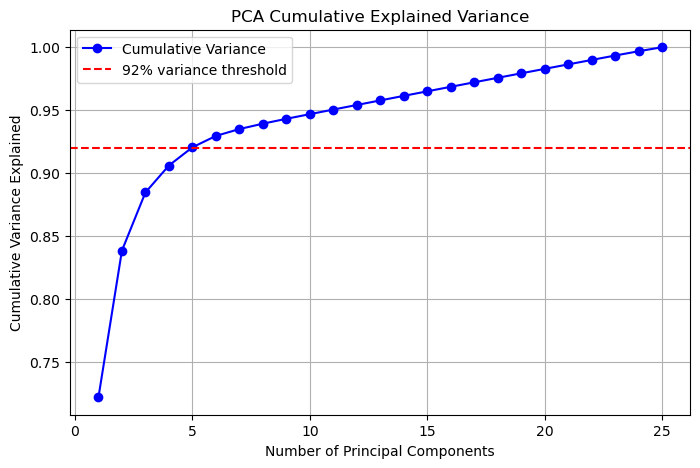

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25
0,13.000,10.000,51.000,52.000,55.000,49.000,13.000,47.000,58.000,89.000,...,39.000,68.000,79.000,31.000,45.097,37.182,70.000,25.535,40.000,36.000
1,13.000,10.000,61.000,62.000,65.000,59.000,13.000,57.000,68.000,99.000,...,39.000,78.000,89.000,31.000,50.000,45.000,80.000,31.000,50.000,36.000
2,13.000,10.000,61.000,62.000,65.000,59.000,13.000,57.000,68.000,89.000,...,39.000,76.577,80.889,31.000,50.000,45.000,70.000,31.000,50.000,36.000
3,13.000,10.000,61.000,58.127,62.668,59.000,13.000,57.000,59.356,89.000,...,39.000,68.000,79.000,31.000,50.000,45.000,70.000,31.000,50.000,36.000
4,13.000,10.000,51.000,52.000,55.000,49.000,13.000,47.000,58.000,89.000,...,29.000,68.000,79.000,21.000,40.000,35.000,70.000,21.000,40.000,26.000


In [6]:
# The below code was generated by ChatGPT

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(42)

# Set parameters
num_features = 25  # Number of features/columns
num_rows = 200000    # Number of rows in the dataframe
target_variance_explained = 0.75  # Target variance explained by the first component

# Step 1: Create a strong first principal component (PC1) that dominates variance
# Generate base data for the dominant feature
base_data = np.random.rand(num_rows, 1) * 100  # This will be the main component

# Step 2: Add noise to create more features while keeping correlations strong
# For features with high correlation, add small noise to base_data
features = base_data + np.random.randn(num_rows, num_features) * 5  # Adjust noise

# Step 3: Ensure that each feature's values are constrained within a range [min, min+10]
for i in range(num_features):
    min_val = np.random.randint(0, 90)  # Randomly select a min value for each feature
    features[:, i] = np.clip(features[:, i], min_val, min_val + 10)

# Create the pandas dataframe from the features
df = pd.DataFrame(features, columns=[f"Feature_{i+1}" for i in range(num_features)])

# Step 4: Perform PCA to check the variance explained
pca = PCA(n_components=num_features)
pca.fit(df)

# Calculate explained variance and cumulative explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Step 5: Adjust the noise in subsequent features to get cumulative variance close to 92%
# If necessary, iterate or fine-tune noise to achieve the 92% requirement

# Output the cumulative variance for the first principal components
print(f"Explained variance by first component: {explained_variance_ratio[0]:.2f}")
print(f"Cumulative variance explained by the first 15 components: {cumulative_variance[14]:.2f}")

# Step 6: Plot the explained variance (smooth elbow curve)
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_features + 1), cumulative_variance, marker='o', linestyle='-', color='b', label='Cumulative Variance')
plt.axhline(y=0.92, color='r', linestyle='--', label='92% variance threshold')
plt.title("PCA Cumulative Explained Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Variance Explained")
plt.grid(True)
plt.legend()
plt.show()

# Display the dataframe
df.head()


In [7]:
df.describe()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25
count,200000.000,200000.000,200000.000,200000.000,200000.000,200000.000,200000.000,200000.000,200000.000,200000.000,...,200000.000,200000.000,200000.000,200000.000,200000.000,200000.000,200000.000,200000.000,200000.000,200000.000
mean,12.182,9.445,55.408,56.309,59.009,53.604,12.183,51.811,61.706,89.644,...,35.609,70.698,80.603,28.403,45.508,41.001,72.503,28.404,45.508,32.911
std,2.439,1.971,4.794,4.780,4.729,4.812,2.440,4.825,4.651,2.141,...,4.555,4.248,3.432,4.192,4.803,4.724,4.135,4.188,4.805,4.434
min,3.000,0.000,51.000,52.000,55.000,49.000,3.000,47.000,58.000,89.000,...,29.000,68.000,79.000,21.000,40.000,35.000,70.000,21.000,40.000,26.000
25%,13.000,10.000,51.000,52.000,55.000,49.000,13.000,47.000,58.000,89.000,...,29.000,68.000,79.000,25.002,40.000,35.000,70.000,25.021,40.000,26.000
50%,13.000,10.000,51.000,52.000,55.000,50.093,13.000,50.093,58.000,89.000,...,39.000,68.000,79.000,31.000,50.000,45.000,70.000,31.000,50.000,36.000
75%,13.000,10.000,61.000,62.000,65.000,59.000,13.000,57.000,68.000,89.000,...,39.000,74.987,79.000,31.000,50.000,45.000,75.018,31.000,50.000,36.000
max,13.000,10.000,61.000,62.000,65.000,59.000,13.000,57.000,68.000,99.000,...,39.000,78.000,89.000,31.000,50.000,45.000,80.000,31.000,50.000,36.000


## Data Visualization

##### Creating a correlation heatmap is a great way to visualize the relationships between different features in your DataFrame. 

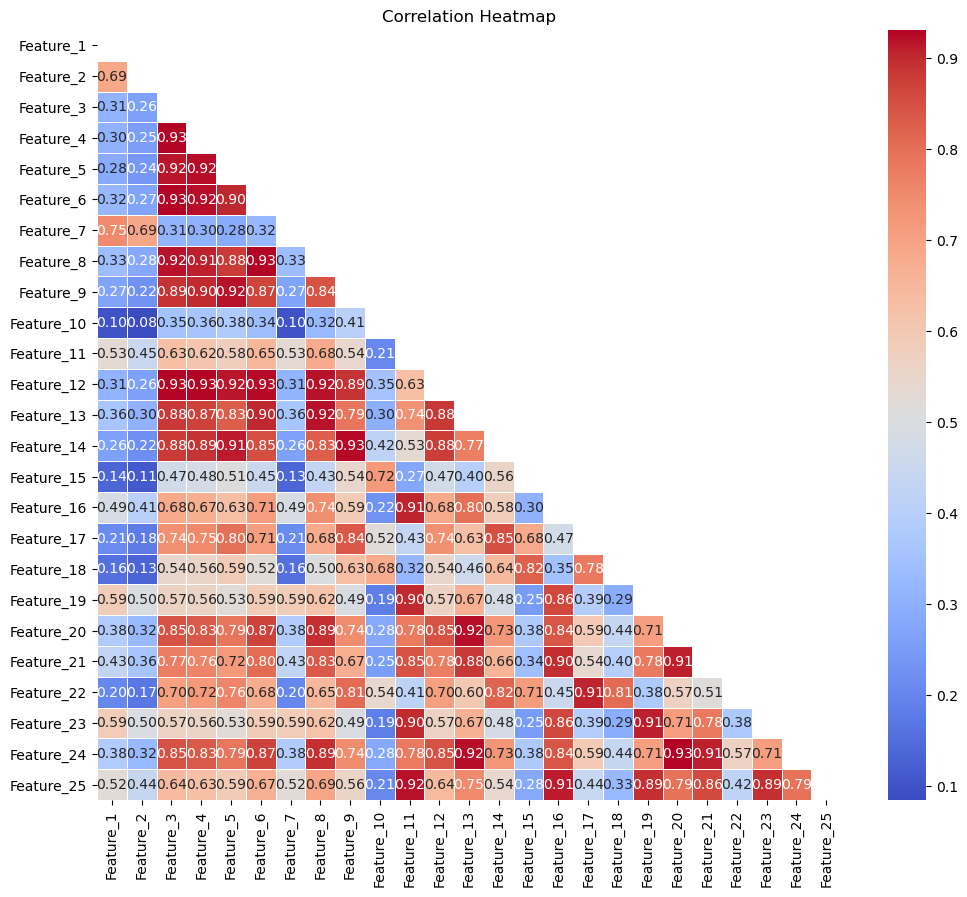

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(12, 10))  # Adjust size as needed
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, mask = mask)
plt.title('Correlation Heatmap')
plt.show()

##### Observe the line plot of each feature and how they travel across the rows 

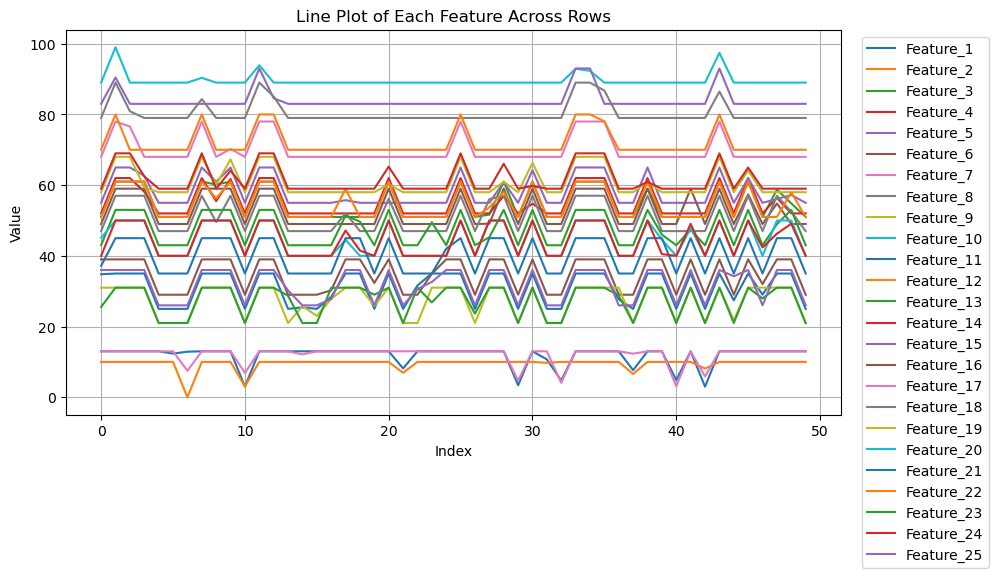

In [12]:
plt.figure(figsize=(10, 5))  # Adjust the figure size as needed

df_lim = df[0:50]
# Plot each feature in the DataFrame
for column in df_lim.columns:
    plt.plot(df_lim.index, df_lim[column], label=column)

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Line Plot of Each Feature Across Rows')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))  # Adjust legend placement as needed
plt.grid(True)
plt.show()

We can see from above heatmap and line plots, that all the features appear to maintain a good positive correlation among each other. 

## Prepare train and test datasets

In [110]:
# Function to remove the outliers from a given data frame based on the Inter Quantile Range of the features.
def rem_outlier_df(df):

    Q1 = df.quantile(0.25)
    #print(Q1)
    Q3 = df.quantile(0.75)
    #print(Q3)
    
    IQR = Q3 - Q1

    ret_df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

    return ret_df

In [112]:
# Shuffle the rows of the data frame.
shuffled_df = df.sample(frac = 1)

In [114]:
# Split train and test datasets from the original data frame.
train_df = shuffled_df.iloc[0:180000]
test_df = shuffled_df.iloc[180000:]

#train_df = shuffled_df.iloc[0:100000]
#test_df = shuffled_df.iloc[100000:]

#train_df = train_df.sample(frac = 1)
print(train_df.shape)
print(test_df.shape)

(180000, 25)
(20000, 25)


In [116]:
# Remove the outliers from the training df and test_df to create a good_test_df.
train_df = rem_outlier_df(train_df)
good_test_df = rem_outlier_df(test_df)

print(train_df.shape)
print(good_test_df.shape)

(109917, 25)
(12294, 25)


## Apply PCA and examine the variance contributions of PCs 
#### This will help in arriving at an optimum number of n ( smaller dimensions to reduce the original 25 features) 

Variance delta added for every new PC : 

1    0.690
2    0.129
3    0.041
4    0.018
5    0.011
6    0.009
7    0.008
8    0.008
9    0.008
10   0.008
11   0.008
12   0.008
13   0.008
14   0.008
15   0.008
16   0.008
17   0.008
18   0.008
19   0.006
dtype: float64

Cummulative Variance after adding every new PC : 

1    0.690
2    0.819
3    0.860
4    0.878
5    0.888
6    0.897
7    0.905
8    0.914
9    0.922
10   0.930
11   0.938
12   0.947
13   0.955
14   0.963
15   0.971
16   0.979
17   0.987
18   0.994
19   1.000
dtype: float64

Transformed Shape : (109917, 19)


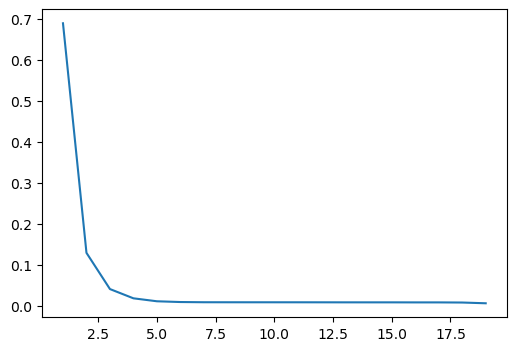

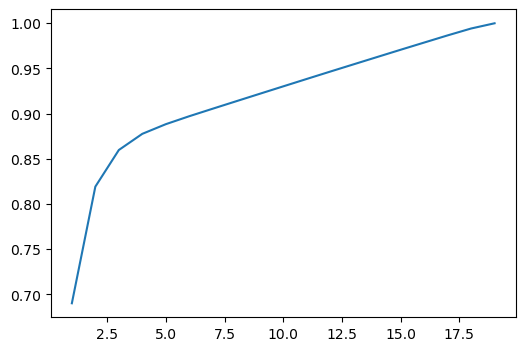

In [119]:
# Fit a PCA model on the training data, to explain all the variance 
train_pca = PCA(0.9999)
train_df_pca_transf = train_pca.fit_transform(train_df)

# Plot and examine how much each feature contribute to the total variance in the dataset.
exp_var_pca = pd.Series(train_pca.explained_variance_ratio_)
exp_var_pca.index += 1
print("Variance delta added for every new PC : \n")
print(pd.Series(exp_var_pca))
print()
print("Cummulative Variance after adding every new PC : \n")
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
print(cum_sum_eigenvalues)
print()
print("Transformed Shape : " + str(train_df_pca_transf.shape))

fig, ax = plt.subplots(figsize=(6,4))
plt.plot(exp_var_pca)
fig, ax = plt.subplots(figsize=(6,4))
plt.plot(cum_sum_eigenvalues)

We can see above that just the first 5 principal components (PC) could explain around 89% of the total variance. 
The subsequent PCs do not add much value to the cumulative variance.
This can also be seen on the exp_var_pca plot above. The curve elbow is at around 5, beyond which the line flattens.
So we can pick 5 as the value of n. That means we will reduce 25 features into 5 PCs going forward. 

##### For later experimentations, you can also pick a higher value or a lower value of n, to see whether PCA overfits !

## Train/Fit the PCA on training dataset

In [127]:
## Some helper functions.

# Function to compute the reconstruction error - Mean Absolute error.
  # Given the original df and the reconstructed df, we compute and return
    # the reconstruction error matrix (containing the error for each cell in the df)
    # the average loss row-wise. 
    # the average loss column-wise.

def df_mae_loss_score(originalDF, reconstDF):
    
    mae_err_matrix = np.abs((np.array(originalDF) - np.array(reconstDF)))
    #mae_err_matrix_rounded = np.around(mae_err_matrix, decimals=3)
    
    col_loss = np.sum(mae_err_matrix, axis = 0) / originalDF.shape[0]
    col_loss = pd.Series(data = col_loss, index = range(0,len(col_loss)))
    
    row_loss = np.sum(mae_err_matrix, axis = 1) / originalDF.shape[1]
    row_loss = pd.Series(data = row_loss, index = originalDF.index)
    
    return (row_loss, col_loss, mae_err_matrix)


# Function to train the PCA on a training dataset, reduce, reconstruct and compute error on the training dataset. 
    # Fits PCA and transforms the training df to a reduced dimension given by n_components.
    # Reconstructs the original features back from the reduced PCs, computes row wise and column wise average errors.
    # Returns the trained PCA model, row wise and column wise average errors of the training dataset.
def pca_train(train_sample_df, n_components):
    
    print("Original Shape : " + str(train_sample_df.shape))

    # PCA model
    train_pca = PCA(n_components)

    # Fit the PCA model on the training data and transform the same to get the reduced dimensioned data.
    train_df_pca_transf = train_pca.fit_transform(train_sample_df)
    
    exp_var_pca = train_pca.explained_variance_ratio_
    cum_sum_eigenvalues = np.cumsum(exp_var_pca)
    print(cum_sum_eigenvalues)
    
    print("Transformed Shape : " + str(train_df_pca_transf.shape))

    # Reconstruct the original features from reduced dimensions.
    train_df_pca_reverse = train_pca.inverse_transform(train_df_pca_transf)
    #print(train_df_pca_revers.shape)
    
    print(train_sample_df)
    print()
    print(train_df_pca_reverse)
    print(type(train_df_pca_reverse))

    # Compute the reconstruction errors.
    train_row_loss, train_col_loss, err_matrix = df_mae_loss_score(train_sample_df, pd.DataFrame(train_df_pca_reverse))
    
    return (train_pca, train_row_loss, train_col_loss)


# Function to apply a trained PCA model on a test dataset, reduce, reconstruct and compute error on the test dataset. 
    # Transforms the test df to a reduced dimension by applying the trained PCA model.
    # Reconstructs the original features back from the reduced PCs, computes row wise and column wise average errors.
    # Returns the row wise and column wise average errors of the test dataset, the error matrix and reconstructed test data.
def pca_test(test_df, train_pca):
    
    test_df_pca_transf = train_pca.transform(test_df)
    test_df_pca_reverse = train_pca.inverse_transform(test_df_pca_transf)
        
    test_row_loss, test_col_loss, err_matrix  = df_mae_loss_score(test_df, pd.DataFrame(test_df_pca_reverse))
        
    return(test_row_loss, test_col_loss, err_matrix, test_df_pca_reverse)

In [129]:
#### Fit/train a PCA model on the training dataset. 

#num_components = 0.94
#num_components = 0.90
#num_components = 8

num_components = 5
train_pca, train_row_loss, train_col_loss = pca_train(train_df, num_components)

Original Shape : (109917, 25)
[0.69  0.819 0.86  0.878 0.888]
Transformed Shape : (109917, 5)
        Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
27729      13.000     10.000     51.000     52.000     55.000     49.000   
168397     13.000     10.000     51.000     52.000     55.000     49.000   
189039     13.000     10.000     51.000     52.000     55.000     49.000   
84705      13.000     10.000     61.000     62.000     65.000     59.000   
105216     13.000     10.000     55.419     53.150     62.614     59.000   
...           ...        ...        ...        ...        ...        ...   
93033      13.000     10.000     51.000     52.000     55.000     49.000   
92691      13.000     10.000     51.000     57.933     55.000     49.000   
141858     13.000     10.000     51.000     52.000     55.000     49.000   
7779       13.000     10.000     51.000     52.000     55.000     52.055   
132194     13.000     10.000     51.000     52.000     55.000     49.0

##### Examine the distribution of the reconstruction error across training data rows 

count   109917.000
mean         0.594
std          0.279
min          0.029
25%          0.400
50%          0.567
75%          0.769
max          1.900
dtype: float64


C:\Users\rajar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


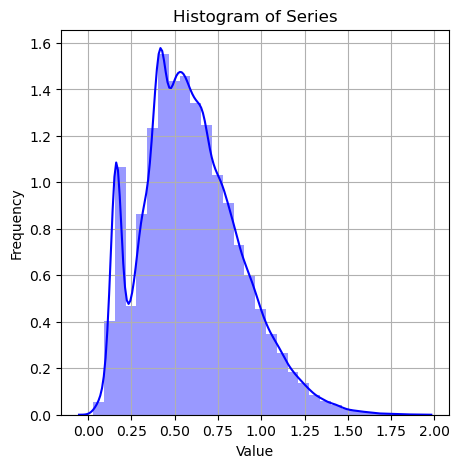

In [132]:
print(train_row_loss.describe())

plt.figure(figsize=(5, 5))  # Adjust the size as needed
sns.distplot(train_row_loss, bins=30, kde=True, color='blue')  # Set kde=True to overlay a KDE plot
plt.title('Histogram of Series')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

We see that the PCA reconstruction error distribution is close to a normal distribution with mean centered at around 0.59

In [135]:
print(train_col_loss.describe())

count   25.000
mean     0.594
std      0.343
min      0.000
25%      0.667
50%      0.768
75%      0.800
max      0.843
dtype: float64


## Apply the trained PCA model on test dataset

In [139]:
# Call pca_test with the test data frame and the trained PCA model
good_test_row_loss, good_test_col_loss, sqr_err_matrix, test_reconstructed = pca_test(good_test_df, train_pca)

In [141]:
print(good_test_row_loss.describe())

count   12294.000
mean        0.594
std         0.278
min         0.032
25%         0.400
50%         0.567
75%         0.767
max         1.878
dtype: float64


In [143]:
good_test_col_loss.describe()

count   25.000
mean     0.594
std      0.344
min      0.000
25%      0.663
50%      0.767
75%      0.804
max      0.853
dtype: float64

C:\Users\rajar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


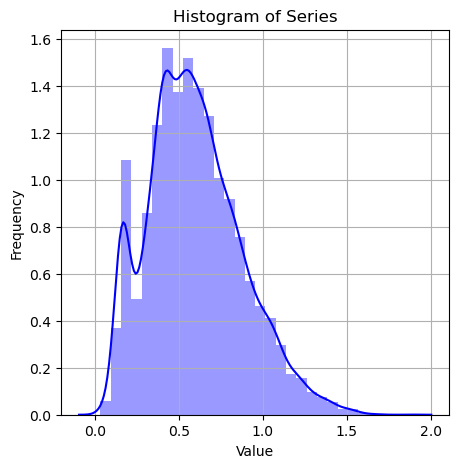

In [145]:
plt.figure(figsize=(5, 5))  # Adjust the size as needed
sns.distplot(good_test_row_loss, bins=30, kde=True, color='blue')  # Set kde=True to overlay a KDE plot
plt.title('Histogram of Series')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)

Text(0.5, 1.0, 'Comparison - Spread of Reconstruction Errors')

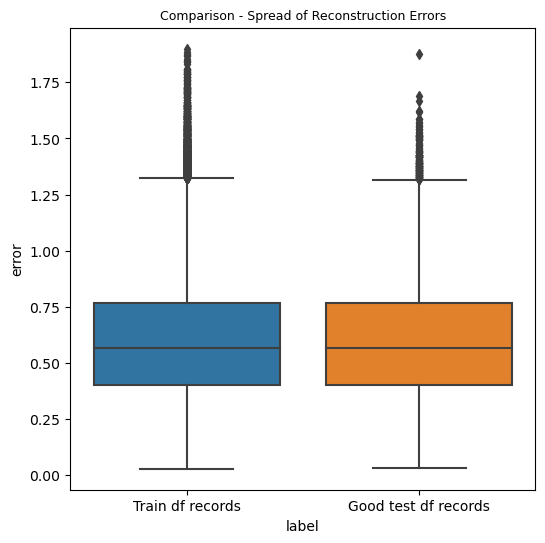

In [147]:
# Box plot comparison of distributions of train record errors, good test record errors
import seaborn as sns

plt.figure(figsize=(6,6))
total_loss_df = pd.DataFrame()

box_plot_df1 = pd.DataFrame(train_row_loss)
box_plot_df1.columns = ['error']
box_plot_df1['label'] = 'Train df records'

box_plot_df2 = pd.DataFrame(good_test_row_loss)
box_plot_df2.columns = ['error']
box_plot_df2['label'] = 'Good test df records'

total_loss_df = pd.concat([total_loss_df, box_plot_df1, box_plot_df2], axis = 0)

sns.boxplot(x = 'label', y = 'error', data = total_loss_df).\
            axes.set_title('Comparison - Spread of Reconstruction Errors', fontsize = 9)


We see that the PCA reconstruction error distribution of the test data is closely similar to that of the training data, with the mean error also almost the same as 0.59 

This proves that the PCA model trained on the good training dataset, is able to generalize well (reduce and reconstruct well) on a similarly good test data. Here by "good", we mean dataset with good linear correlation among the features.


## Detecting an anomaly

In [151]:
# Take a copy of the test data frame.
bad_test_df = good_test_df.copy().reset_index().drop('index', axis=1)
bad_test_df[0:10]

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25
0,13.000,10.000,51.000,52.000,55.000,49.000,13.000,47.000,58.000,89.000,...,29.000,68.000,79.000,21.000,40.000,35.000,70.000,21.000,40.000,32.522
1,13.000,10.000,51.000,52.000,55.000,49.000,13.000,47.000,58.000,89.000,...,29.000,68.000,79.000,21.000,40.000,35.000,70.000,25.777,40.000,26.000
2,13.000,10.000,61.000,61.401,65.000,59.000,13.000,57.000,68.000,89.000,...,39.000,72.126,79.000,31.000,50.000,45.000,70.000,31.000,50.000,36.000
3,13.000,10.000,51.000,52.000,55.000,49.000,13.000,47.000,58.000,89.000,...,29.000,68.000,79.000,21.000,40.000,35.000,70.000,22.205,40.000,26.000
4,13.000,10.000,51.000,52.000,55.000,49.000,13.000,50.846,58.000,89.000,...,39.000,68.000,79.000,31.000,42.272,39.853,70.000,31.000,41.075,36.000
5,13.000,10.000,51.000,52.000,55.000,49.000,13.000,47.000,58.000,89.000,...,31.083,68.000,79.000,22.480,40.000,35.000,70.000,21.878,40.000,28.303
6,13.000,10.000,51.000,52.000,55.000,49.000,13.000,50.692,58.000,89.000,...,39.000,68.000,79.000,31.000,40.000,35.000,70.000,31.000,40.000,36.000
7,13.000,10.000,51.000,52.000,55.000,49.000,13.000,47.000,58.000,89.000,...,29.000,68.000,79.000,21.000,40.000,35.000,70.000,21.000,40.000,26.000
8,13.000,10.000,61.000,62.000,65.000,59.000,13.000,57.000,68.000,89.000,...,39.000,76.799,79.000,31.000,50.000,45.000,70.000,31.000,50.000,36.000
9,13.000,10.000,61.000,62.000,65.000,59.000,13.000,57.000,68.000,89.000,...,39.000,69.363,79.000,31.000,50.000,45.000,72.384,31.000,50.000,36.000


In [153]:
# Skew the value of feature_4 of the sixth row of the data set to an extremly high value (anomaly)
bad_test_df.loc[6, 'Feature_4'] = 500

In [155]:
bad_test_df[0:10]

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25
0,13.000,10.000,51.000,52.000,55.000,49.000,13.000,47.000,58.000,89.000,...,29.000,68.000,79.000,21.000,40.000,35.000,70.000,21.000,40.000,32.522
1,13.000,10.000,51.000,52.000,55.000,49.000,13.000,47.000,58.000,89.000,...,29.000,68.000,79.000,21.000,40.000,35.000,70.000,25.777,40.000,26.000
2,13.000,10.000,61.000,61.401,65.000,59.000,13.000,57.000,68.000,89.000,...,39.000,72.126,79.000,31.000,50.000,45.000,70.000,31.000,50.000,36.000
3,13.000,10.000,51.000,52.000,55.000,49.000,13.000,47.000,58.000,89.000,...,29.000,68.000,79.000,21.000,40.000,35.000,70.000,22.205,40.000,26.000
4,13.000,10.000,51.000,52.000,55.000,49.000,13.000,50.846,58.000,89.000,...,39.000,68.000,79.000,31.000,42.272,39.853,70.000,31.000,41.075,36.000
5,13.000,10.000,51.000,52.000,55.000,49.000,13.000,47.000,58.000,89.000,...,31.083,68.000,79.000,22.480,40.000,35.000,70.000,21.878,40.000,28.303
6,13.000,10.000,51.000,500.000,55.000,49.000,13.000,50.692,58.000,89.000,...,39.000,68.000,79.000,31.000,40.000,35.000,70.000,31.000,40.000,36.000
7,13.000,10.000,51.000,52.000,55.000,49.000,13.000,47.000,58.000,89.000,...,29.000,68.000,79.000,21.000,40.000,35.000,70.000,21.000,40.000,26.000
8,13.000,10.000,61.000,62.000,65.000,59.000,13.000,57.000,68.000,89.000,...,39.000,76.799,79.000,31.000,50.000,45.000,70.000,31.000,50.000,36.000
9,13.000,10.000,61.000,62.000,65.000,59.000,13.000,57.000,68.000,89.000,...,39.000,69.363,79.000,31.000,50.000,45.000,72.384,31.000,50.000,36.000


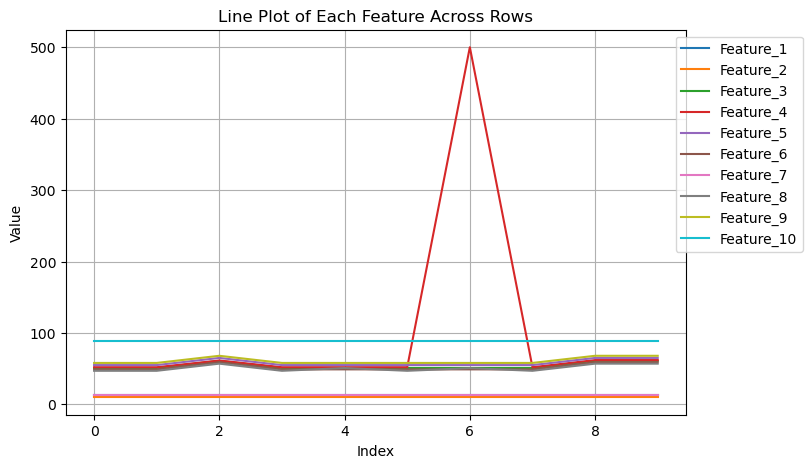

In [157]:
plt.figure(figsize=(8, 5))  # Adjust the figure size as needed

df_lim = bad_test_df.iloc[0:10, 0:10]
# Plot each feature in the DataFrame
for column in df_lim.columns:
    plt.plot(df_lim.index, df_lim[column], label=column)

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Line Plot of Each Feature Across Rows')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))  # Adjust legend placement as needed
plt.grid(True)
plt.show()

In [159]:
# Pass the data set with the anomaly, to the PCA model and get the reconstruction errors.
bad_test_row_loss, bad_test_col_loss, bad_sqr_err_matrix, bad_test_reconstructed = pca_test(bad_test_df, train_pca)

In [161]:
bad_test_row_loss[0:10]

0    0.622
1    0.256
2    0.419
3    0.134
4    0.625
5    0.323
6   35.847
7    0.166
8    0.364
9    0.344
dtype: float64

In [163]:
print(bad_test_row_loss.describe())

count   12294.000
mean        0.597
std         0.422
min         0.032
25%         0.400
50%         0.567
75%         0.767
max        35.847
dtype: float64


In [165]:
bad_test_row_loss.idxmax()

6

We can observe that the reconstruction error of the row 6 is far high (maximum of all the errors) compared to the other rows, indicating that our PCA model has not been able to reconstruct that particular row with the anomaly.
So we that row stands out as an anomaly in the reconstruction errors data. **Thus PCA has helped us identify that record.** 

##### Visualise and compare the reconstruction error distribution of training df, good test df and the bad test df.

Text(0.5, 1.0, 'Comparison - Spread of Reconstruction Errors')

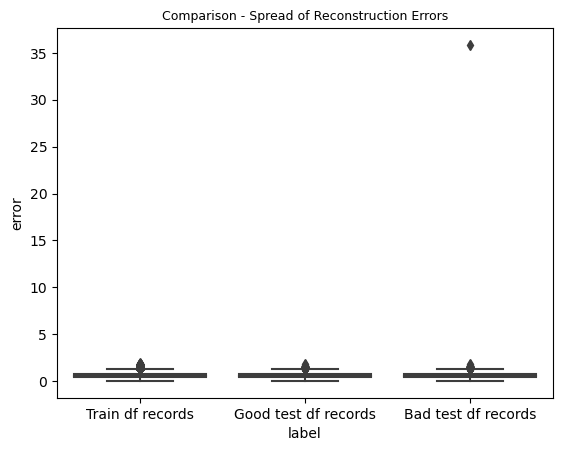

In [169]:
total_loss_df = pd.DataFrame()

box_plot_df1 = pd.DataFrame(train_row_loss)
box_plot_df1.columns = ['error']
box_plot_df1['label'] = 'Train df records'

box_plot_df2 = pd.DataFrame(good_test_row_loss)
box_plot_df2.columns = ['error']
box_plot_df2['label'] = 'Good test df records'

box_plot_df3 = pd.DataFrame(bad_test_row_loss)
box_plot_df3.columns = ['error']
box_plot_df3['label'] = 'Bad test df records'

total_loss_df = pd.concat([total_loss_df, box_plot_df1, box_plot_df2, box_plot_df3], axis = 0)

sns.boxplot(x = 'label', y = 'error', data = total_loss_df).\
            axes.set_title('Comparison - Spread of Reconstruction Errors', fontsize = 9)


We can see the bad anomalous record isolated at the top right of the above chart !

###### Now examine closely the original bad test df record, the corresponding reconstructed data and reconstruction errors by the PCA model

In [173]:
# Original anomalous data - Record 6, Feature_4 is anomalous
bad_test_df.iloc[5:8]

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25
5,13.000,10.000,51.000,52.000,55.000,49.000,13.000,47.000,58.000,89.000,...,31.083,68.000,79.000,22.480,40.000,35.000,70.000,21.878,40.000,28.303
6,13.000,10.000,51.000,500.000,55.000,49.000,13.000,50.692,58.000,89.000,...,39.000,68.000,79.000,31.000,40.000,35.000,70.000,31.000,40.000,36.000
7,13.000,10.000,51.000,52.000,55.000,49.000,13.000,47.000,58.000,89.000,...,29.000,68.000,79.000,21.000,40.000,35.000,70.000,21.000,40.000,26.000


In [175]:
# Records reconstructed by the PCA model for the above three original records. 
bad_test_reconstructed[5:8]

array([[ 13.   ,  10.   ,  50.73 ,  52.042,  55.234,  48.812,  13.   ,
         46.61 ,  58.319,  89.   ,  25.884,  50.974,  42.81 ,  59.35 ,
         83.   ,  30.188,  67.616,  79.   ,  22.586,  40.165,  35.971,
         69.655,  22.597,  40.162,  26.871],
       [ 13.   ,  10.   , 119.928, 129.669, 128.886, 112.99 ,  13.   ,
         91.129, 109.991,  89.   ,  36.538, 126.351,  52.804, 102.704,
         83.   ,  42.603,  35.407,  79.   ,  30.059,  31.323,  27.036,
         39.339,  29.798,  31.303,  37.864],
       [ 13.   ,  10.   ,  50.783,  52.01 ,  55.124,  48.894,  13.   ,
         46.78 ,  58.205,  89.   ,  24.541,  50.977,  42.951,  59.239,
         83.   ,  28.889,  67.768,  79.   ,  21.415,  40.133,  35.346,
         69.793,  21.434,  40.131,  25.521]])

In [177]:
# Corresponding reconstruction errors across the features, for the three records 
bad_sqr_err_matrix[5:8]

array([[  0.   ,   0.   ,   0.27 ,   0.042,   0.234,   0.188,   0.   ,
          0.39 ,   0.319,   0.   ,   0.884,   0.026,   0.19 ,   0.35 ,
          0.   ,   0.895,   0.384,   0.   ,   0.106,   0.165,   0.971,
          0.345,   0.719,   0.162,   1.432],
       [  0.   ,   0.   ,  68.928, 370.331,  73.886,  63.99 ,   0.   ,
         40.437,  51.991,   0.   ,   1.538,  75.351,   9.804,  43.704,
          0.   ,   3.603,  32.593,   0.   ,   0.941,   8.677,   7.964,
         30.661,   1.202,   8.697,   1.864],
       [  0.   ,   0.   ,   0.217,   0.01 ,   0.124,   0.106,   0.   ,
          0.22 ,   0.205,   0.   ,   0.459,   0.023,   0.049,   0.239,
          0.   ,   0.111,   0.232,   0.   ,   0.415,   0.133,   0.346,
          0.207,   0.434,   0.131,   0.479]])

We can clearly observe only the **record 6 ( second row in above ) has high reconstruction errors** for the feature values.

#### Can we also find the exact feature in that record which is anomaly ? Let's find out !
###### Now we will try to see which feature/column shows up the highest error in that record

In [181]:
# Show the column index with the maximum error in the record 6
pd.Series(bad_sqr_err_matrix[6]).idxmax()

3

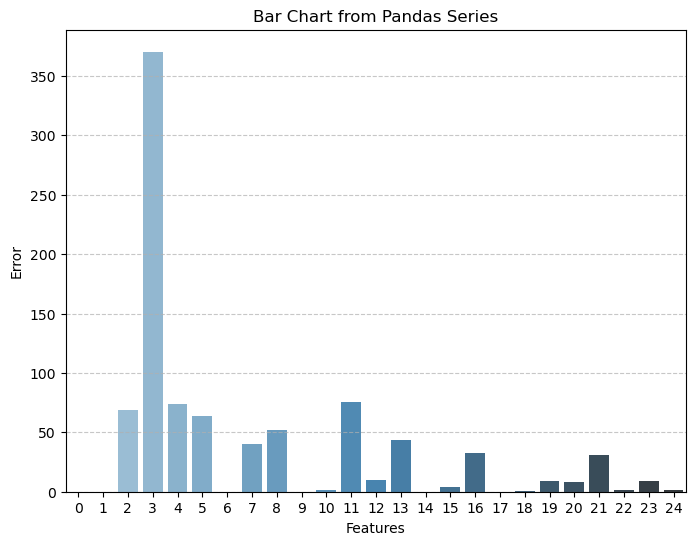

In [183]:
data = pd.DataFrame(bad_sqr_err_matrix[6], index = list(range(0, 25)))
col_err_df = data.reset_index()
col_err_df.columns = ['Features', 'Error']

plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.barplot(x='Features', y='Error', data=col_err_df, palette='Blues_d')
plt.title('Bar Chart from Pandas Series')
plt.xlabel('Features')
plt.ylabel('Error')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability
plt.show()


Vow !! We can see above that **the column 3 (Feature_4 which was anomaly) shows the highest error** in that record. <br>

##### So, PCA has also helped us find out the exact feature in that record which is anomaly !!

In [186]:
# Print the pairs of the feature value, corresponding reconstruction error in the record 6.
list(zip(bad_test_df.iloc[6].round(3), bad_sqr_err_matrix[6].round(3)))

[(13.0, 0.0),
 (10.0, 0.0),
 (51.0, 68.928),
 (500.0, 370.331),
 (55.0, 73.886),
 (49.0, 63.99),
 (13.0, 0.0),
 (50.692, 40.437),
 (58.0, 51.991),
 (89.0, 0.0),
 (35.0, 1.538),
 (51.0, 75.351),
 (43.0, 9.804),
 (59.0, 43.704),
 (83.0, 0.0),
 (39.0, 3.603),
 (68.0, 32.593),
 (79.0, 0.0),
 (31.0, 0.941),
 (40.0, 8.677),
 (35.0, 7.964),
 (70.0, 30.661),
 (31.0, 1.202),
 (40.0, 8.697),
 (36.0, 1.864)]

#### So, we are able to use the PCA model to isolate and detect the anomaly in the dataset along with the information on the specific record and the feature.